# Mixture of Compounds Analysis
In this notebook we are going to analyse the features extracted with the measurements performed with mixture of compounds.

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats
import itertools
from pathlib import Path
import os

CURRENT_DIR = Path().resolve()
OUTPUTS_FOLDER = CURRENT_DIR.parent / "Outputs" / "Features MIX" / "TEST_R_NORM_ZSCORE"

## Load Features

In [45]:
features = pd.read_csv(r"C:\Users\resca\OneDrive - Politecnico di Milano\_Dottorato\4 - Code\temperature-enose-data-analysis\mos-v2\Outputs\Features MIX\TEST_R_NORM_ZSCORE\compound_mixtures_features.csv", index_col=0)
features.head()

,DeltaH,DeltaT1,DeltaT2,DeltaT3,SlopeH,SlopeL,AreaS,AreaT,DeltaR,Temperature Modulation,Sensor,Repetition,Mixture,Isopropanol,Acetone,Toluene
0,0.005223,2.454860,-0.500638,0.519509,-0.000104,0.013567,-1.240538,71.374309,0.399253,Sq+Tr,S-1,0,150_150_300_noGC,150,150,300
1,2.119416,2.101315,-0.493966,0.511303,0.001302,0.013243,767.268340,69.921828,0.399253,Sq+Tr,S-1,1,150_150_300_noGC,150,150,300
2,2.157843,2.138796,-0.510229,0.527868,0.001322,0.013753,779.647181,72.259879,0.399253,Sq+Tr,S-1,2,150_150_300_noGC,150,150,300
3,2.225794,2.205778,-0.527302,0.546288,0.001369,0.014175,803.960282,74.932350,0.399253,Sq+Tr,S-1,3,150_150_300_noGC,150,150,300
4,2.295700,2.274938,-0.543557,0.563334,0.001418,0.014573,827.758539,77.237709,0.399253,Sq+Tr,S-1,4,150_150_300_noGC,150,150,300


## Process Features
Remove sensors S-7 and S-8

In [46]:
features = features[~features["Sensor"].isin(["S-1", "S-6", "S-7","S-8"])]
unique_sensors = features["Sensor"].unique()
unique_features = ["DeltaH",
    "DeltaT1",
    "DeltaT2",
    "DeltaT3",
    "SlopeH",
    "SlopeL",
    "AreaS",
    "AreaT",]

Remove Repetition 0 and 11

In [47]:
features.loc[features.Isopropanol < 100, "Isopropanol"] = 50
features.loc[(features.Isopropanol > 100) & (features.Isopropanol < 220), "Isopropanol"] = 150
features.loc[features.Isopropanol > 230, "Isopropanol"] = 300

features.loc[features.Acetone < 100, "Acetone"] = 50
features.loc[(features.Acetone > 100) & (features.Acetone < 180), "Acetone"] = 150
features.loc[features.Acetone > 200, "Acetone"] = 300

features.loc[features.Toluene < 120, "Toluene"] = 50
features.loc[(features.Toluene > 120) & (features.Toluene < 340) & (features.Toluene != 300), "Toluene"] = 150
features.loc[(features.Toluene > 350), "Toluene"] = 300

features = features[features["Repetition"] > 0].reset_index(drop=True)
features = features[features["Repetition"] < 6].reset_index(drop=True)

# Generate new column names
all_columns = list(itertools.product(unique_sensors, unique_features))
all_columns = [f"{x[0]}-{x[1]}" for x in all_columns]
all_columns.append("Mixture")
all_columns.append("Isopropanol")
all_columns.append("Acetone")
all_columns.append("Toluene")

def apply_cat_conc(x):
    if x < 100:
        return "L"
    elif x >= 100 and x <= 200:
        return "M"
    else:
        return "H"
    
features["Isopropanol"] = features[
    "Isopropanol"
].apply(apply_cat_conc)
features["Acetone"] = features[
    "Acetone"
].apply(apply_cat_conc)
features["Toluene"] = features[
    "Toluene"
].apply(apply_cat_conc)

features["Mixture"] = (
    features["Isopropanol"]
    + "-"
    + features["Acetone"]
    + "-"
    + features["Toluene"]
)

features = features[features["Repetition"]>0]
features = features[features["Repetition"]<6]

features[unique_features] = features[unique_features].apply(scipy.stats.zscore)

features.head()

,DeltaH,DeltaT1,DeltaT2,DeltaT3,SlopeH,SlopeL,AreaS,AreaT,DeltaR,Temperature Modulation,Sensor,Repetition,Mixture,Isopropanol,Acetone,Toluene
0,-1.029659,-1.099054,0.853276,-0.774549,-0.730178,-0.872821,-1.074794,-0.571156,0.71642,Sq+Tr,S-2,1,M-M-H,M,M,H
1,-0.899189,-0.948829,0.375092,-0.573391,-0.501424,-0.556287,-0.902216,-0.525890,0.71642,Sq+Tr,S-2,2,M-M-H,M,M,H
2,-0.639556,-0.635907,-0.159747,-0.312171,-0.078306,-0.234731,-0.555642,-0.448250,0.71642,Sq+Tr,S-2,3,M-M-H,M,M,H
3,-0.387401,-0.330016,-0.671938,-0.071323,0.306564,0.168638,-0.213163,-0.378561,0.71642,Sq+Tr,S-2,4,M-M-H,M,M,H
4,-0.159411,-0.054207,-1.130153,0.147533,0.711567,0.504114,0.096528,-0.314284,0.71642,Sq+Tr,S-2,5,M-M-H,M,M,H


## Visualize Features
We now want to visualize the features for each:
- compound
- sensor
- concentration

In [48]:
unique_mixtures = features["Mixture"].unique()

In [49]:
def plot_feature_values(features, feature):
    # Get unique sensors and first-letter groups from the "Mixture" column
    unique_sensors = features["Sensor"].unique()
    unique_first_letters = sorted(features["Mixture"].str[0].unique())  # First letter (L, M, H)

    print(unique_first_letters)

    # Iterate over each first letter to create a separate figure
    for first_letter in unique_first_letters:
        # Filter features for the current first letter
        filtered_features = features[features["Mixture"].str.startswith(first_letter)]
        
        # Get unique mixtures where the first letter matches
        unique_mixtures = sorted(filtered_features["Mixture"].unique())
        
        # Set up the subplot grid
        fig, ax = plt.subplots(
            nrows=len(unique_sensors), 
            ncols=len(unique_mixtures), 
            sharex=True, 
            sharey=True, 
            figsize=(18, 8)
        )
        fig.suptitle(f"{feature} - Mixtures Starting with {first_letter}", fontsize=24, fontweight="bold")
        
        for row_idx, sensor in enumerate(unique_sensors):
            for col_idx, mixture in enumerate(unique_mixtures):
                # Select the current subplot
                curr_ax = ax[row_idx, col_idx]
                
                # Filter the data for the current sensor and mixture
                data = filtered_features.loc[
                    (filtered_features["Sensor"] == sensor) & 
                    (filtered_features["Mixture"] == mixture)
                ]
                
                # Plot the bar plot
                curr_ax.bar(
                    x=data["Repetition"].values * 4,  # Space out repetitions
                    height=data[feature].values,
                    color='steelblue'
                )
                
                # Add titles and labels
                if row_idx == 0:
                    curr_ax.set_title(mixture, fontweight="bold")
                if row_idx == len(unique_sensors) - 1:
                    curr_ax.set_xlabel("Repetition", fontweight="bold")
                    curr_ax.set_xticks(data["Repetition"].values * 4)
                    curr_ax.set_xticklabels(data["Repetition"].values)
                if col_idx == 0:
                    curr_ax.set_ylabel(sensor, fontweight="bold")
        
        # Adjust layout for better appearance
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for title
        plt.show()        

In [50]:
def plot_feature_values_ACEvar(features, feature):
    # Get unique sensors and the relevant last two-letter combinations
    unique_sensors = features["Sensor"].unique()
    fixed_pairs = ["-L-L", "-M-M", "-H-H"]  # The last two letters of interest
    fixed_pairs = ["-M-M"]

    # Define the color mapping for the first letters
    color_mapping = {"L": "green", "M": "orange", "H": "red"}

    # Iterate over each fixed pair to create separate figures
    for pair in fixed_pairs:
        # Filter features for the current pair
        filtered_features = features[features["Mixture"].str.endswith(pair)]
        
        # Extract the first letter as a new column
        filtered_features["FirstLetter"] = filtered_features["Mixture"].str.split("-").str[0]
        
        # Ensure the order of the first letters is consistent
        filtered_features["FirstLetter"] = pd.Categorical(
            filtered_features["FirstLetter"], categories=["L", "M", "H"], ordered=True
        )
        
        # Set up the subplot grid
        fig, ax = plt.subplots(
            #nrows=len(unique_sensors),
            nrows=1,
            ncols=1,
            #sharex=True,
            #sharey=True,
            figsize=(10, 8)
        )

        if pair == "-L-L":
            #fig.suptitle(f"{feature} - Isopropanol: L - Toluene: L", fontsize=24, fontweight="bold")
            pass
        elif pair == "-M-M":
            #fig.suptitle(f"{feature} - Isopropanol: M - Toluene: M", fontsize=24, fontweight="bold")
            pass
        elif pair == "-H-H":
            #fig.suptitle(f"{feature} - Isopropanol: H - Toluene: H", fontsize=24, fontweight="bold")
            pass

        obj = ["S-3"]

        #for row_idx, sensor in enumerate(unique_sensors):
        for row_idx, sensor in enumerate(obj):            
            # Filter the data for the current sensor
            data = filtered_features[filtered_features["Sensor"] == sensor]
            
            # Plot the boxplot
            sns.boxplot(
                x="FirstLetter",
                y=feature,
                data=data,
                #ax=ax[row_idx],
                palette=color_mapping,
                width=0.5
            )
            
            # Add titles and labels
            #ax[row_idx].set_title(sensor, fontweight="bold", loc="left")
            #ax[row_idx].set_xlabel("Acetone concentration", fontweight="bold")
            #ax[row_idx].set_ylabel(feature, fontweight="bold")
            ax.set_xlabel("Acetone concentration range", fontsize=20)
            ax.set_ylabel(f'{feature} [a.u.]', fontsize=20)
            ax.set_ylim(-2.1, 0.6)
        
        # Adjust layout for better appearance
        #plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for title
        filename_cycles = OUTPUTS_FOLDER / "X-M-M-SlopeL-S3.jpg"
        plt.savefig(filename_cycles, dpi=300, bbox_inches="tight")  # Save with high resolution
        plt.show()


In [51]:
def generate_boxplot_csv_ACEvar(features, feature, sensor_filter, output_csv_path):
    # Define the categories and color mapping
    categories = ["L", "M", "H"]
    color_mapping = {"L": "green", "M": "orange", "H": "red"}

    # Filter the relevant data based on sensor
    filtered_features = features[features["Sensor"] == sensor_filter]
    
    # Further filter based on mixture pair (e.g., "-M-M" for Isopropanol and Toluene at Medium concentration)
    filtered_features = filtered_features[filtered_features["Mixture"].str.endswith("-M-M")]  # Adjust pair as needed
    
    # Extract the first letter from the "Mixture" column (L, M, H)
    filtered_features["FirstLetter"] = filtered_features["Mixture"].str.split("-").str[0]

    # Ensure the order of the first letters is consistent
    filtered_features["FirstLetter"] = pd.Categorical(
        filtered_features["FirstLetter"], categories=categories, ordered=True
    )

    # Calculate statistics for each category (L, M, H)
    summary_stats = []
    for category in categories:
        category_data = filtered_features[filtered_features["FirstLetter"] == category][feature]
        lower_whisker = category_data.min()
        upper_whisker = category_data.max()
        lower_quartile = category_data.quantile(0.25)
        upper_quartile = category_data.quantile(0.75)
        median = category_data.median()

        summary_stats.append({
            "Compound": "Acetone",  # Replace with the compound name
            "Conc_Label": category,
            f"{feature}_LW": lower_whisker,
            f"{feature}_UW": upper_whisker,
            f"{feature}_LQ": lower_quartile,
            f"{feature}_UQ": upper_quartile,
            f"{feature}_M": median
        })

    # Convert the statistics to a DataFrame
    summary_df = pd.DataFrame(summary_stats)

    # Save the DataFrame to CSV
    summary_df.to_csv(output_csv_path, index=False)
    print(f"CSV saved to: {output_csv_path}")

In [52]:
def plot_feature_values_ISOvar(features, feature):
    # Get unique sensors and the relevant first and last letter combinations
    unique_sensors = features["Sensor"].unique()
    fixed_pairs = ["L--L", "M--M", "H--H"]  # The first and last letters of interest
    fixed_pairs = ["L--L"]

    # Define the color mapping for the middle letters
    color_mapping = {"L": "green", "M": "orange", "H": "red"}

    # Iterate over each fixed pair to create separate figures
    for pair in fixed_pairs:
        # Filter features for the current pair
        filtered_features = features[
            (features["Mixture"].str.startswith(pair[0])) & 
            (features["Mixture"].str.endswith(pair[-2:]))
        ]
        
        # Extract the middle letter as a new column
        filtered_features["MiddleLetter"] = filtered_features["Mixture"].str.split("-").str[1]
        
        # Ensure the order of the middle letters is consistent
        filtered_features["MiddleLetter"] = pd.Categorical(
            filtered_features["MiddleLetter"], categories=["L", "M", "H"], ordered=True
        )
        
        # Set up the subplot grid
        fig, ax = plt.subplots(
            #nrows=len(unique_sensors),
            nrows=1,
            ncols=1,
            #sharex=True,
            #sharey=True,
            figsize=(10, 8)
        )

        if pair == "L--L":
            #fig.suptitle(f"{feature} - Acetone: L - Toluene: L", fontsize=24, fontweight="bold")
            pass
        elif pair == "M--M":
            #fig.suptitle(f"{feature} - Acetone: M - Toluene: M", fontsize=24, fontweight="bold")
            pass
        elif pair == "H--H":
            #fig.suptitle(f"{feature} - Acetone: H - Toluene: H", fontsize=24, fontweight="bold")
            pass

        obj = ["S-4"]

        #for row_idx, sensor in enumerate(unique_sensors):
        for row_idx, sensor in enumerate(obj):            
            # Filter the data for the current sensor
            data = filtered_features[filtered_features["Sensor"] == sensor]
            
            # Plot the boxplot
            sns.boxplot(
                x="MiddleLetter",
                y=feature,
                data=data,
                #ax=ax[row_idx],
                palette=color_mapping,
                width=0.5
            )
            
            # Add titles and labels
            #ax[row_idx].set_title(sensor, fontweight="bold", loc="left")
            #ax[row_idx].set_xlabel("Isopropanol concentration", fontweight="bold")
            #ax[row_idx].set_ylabel(feature, fontweight="bold")
            ax.set_xlabel("Isopropanol concentration range", fontsize=20)
            ax.set_ylabel(f'{feature} [a.u.]', fontsize=20)
            ax.set_ylim(-2.1, 0.6)
        
        # Adjust layout for better appearance
        #plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for title
        filename_cycles = OUTPUTS_FOLDER / "L-X-L-AreaT-S4.jpg"
        plt.savefig(filename_cycles, dpi=300, bbox_inches="tight")  # Save with high resolution
        plt.show()
        


In [53]:
def generate_boxplot_csv_ISOvar(features, feature, sensor_filter, output_csv_path):
    # Define the categories and color mapping
    categories = ["L", "M", "H"]
    color_mapping = {"L": "green", "M": "orange", "H": "red"}
    # Filter the relevant data based on sensor
    filtered_features = features[features["Sensor"] == sensor_filter]

    fixed_pairs = ["L--L"]
    # Iterate over each fixed pair
    for pair in fixed_pairs:
        # Filter features for the current pair
        filtered_features = filtered_features[
            (filtered_features["Mixture"].str.startswith(pair[0])) & 
            (filtered_features["Mixture"].str.endswith(pair[-2:]))
        ]
        
        # Extract the middle letter as a new column
        filtered_features["MiddleLetter"] = filtered_features["Mixture"].str.split("-").str[1]
        
        # Ensure the order of the middle letters is consistent
        filtered_features["MiddleLetter"] = pd.Categorical(
            filtered_features["MiddleLetter"], categories=["L", "M", "H"], ordered=True
        )

        # Calculate statistics for each category (L, M, H)
        summary_stats = []
        for category in categories:
            category_data = filtered_features[filtered_features["MiddleLetter"] == category][feature]
            lower_whisker = category_data.min()
            upper_whisker = category_data.max()
            lower_quartile = category_data.quantile(0.25)
            upper_quartile = category_data.quantile(0.75)
            median = category_data.median()

            summary_stats.append({
                "Compound": "Isopropanol",  # Replace with the compound name
                "Conc_Label": category,
                f"{feature}_LW": lower_whisker,
                f"{feature}_UW": upper_whisker,
                f"{feature}_LQ": lower_quartile,
                f"{feature}_UQ": upper_quartile,
                f"{feature}_M": median
            })

        # Convert the statistics to a DataFrame
        summary_df = pd.DataFrame(summary_stats)

        # Save the DataFrame to CSV
        summary_df.to_csv(output_csv_path, index=False)
        print(f"CSV saved to: {output_csv_path}")

In [54]:
def plot_feature_values_TOLvar(features, feature):
    # Get unique sensors and the relevant first two-letter combinations
    unique_sensors = features["Sensor"].unique()
    fixed_pairs = ["L-L-", "M-M-", "H-H-"]  # The first two letters of interest
    fixed_pairs = ["H-H-"]

    # Define the color mapping for the last letters
    color_mapping = {"L": "green", "M": "orange", "H": "red"}

    # Iterate over each fixed pair to create separate figures
    for pair in fixed_pairs:
        # Filter features for the current pair
        filtered_features = features[features["Mixture"].str.startswith(pair)]
        
        # Extract the last letter as a new column
        filtered_features["LastLetter"] = filtered_features["Mixture"].str.split("-").str[-1]
        
        # Ensure the order of the last letters is consistent
        filtered_features["LastLetter"] = pd.Categorical(
            filtered_features["LastLetter"], categories=["L", "M", "H"], ordered=True
        )
        
        # Set up the subplot grid
        fig, ax = plt.subplots(
            #nrows=len(unique_sensors),
            nrows=1,
            ncols=1,
            #sharex=True,
            #sharey=True,
            figsize=(10, 8)
        )

        if pair == "L-L-":
            #fig.suptitle(f"{feature} - Acetone: L - Isopropanol: L", fontsize=24, fontweight="bold")
            pass
        elif pair == "M-M-":
            #fig.suptitle(f"{feature} - Acetone: M - Isopropanol: M", fontsize=24, fontweight="bold")
            pass
        elif pair == "H-H-":
            #fig.suptitle(f"{feature} - Acetone: H - Isopropanol: H", fontsize=24, fontweight="bold")
            pass

        obj = ["S-2"]

        #for row_idx, sensor in enumerate(unique_sensors):
        for row_idx, sensor in enumerate(obj):            
            # Filter the data for the current sensor
            data = filtered_features[filtered_features["Sensor"] == sensor]
            
            # Plot the boxplot
            sns.boxplot(
                x="LastLetter",
                y=feature,
                data=data,
                #ax=ax[row_idx],
                palette=color_mapping,
                width=0.5
            )
            
            # Add titles and labels
            #ax[row_idx].set_title(sensor, fontweight="bold", loc="left")
            #ax[row_idx].set_xlabel("Toluene concentration", fontweight="bold")
            #ax[row_idx].set_ylabel(feature, fontweight="bold")
            ax.set_xlabel("Toluene concentration range", fontsize=20)
            ax.set_ylabel(f'{feature} [a.u.]', fontsize=20)
            ax.set_ylim(-2.1, 0.6)
        
        # Adjust layout for better appearance
        #plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for title
        filename_cycles = OUTPUTS_FOLDER / "H-H-X-DeltaH-S2.jpg"
        plt.savefig(filename_cycles, dpi=300, bbox_inches="tight")  # Save with high resolution
        plt.show()


In [55]:
def generate_boxplot_csv_TOLvar(features, feature, sensor_filter, output_csv_path):
    # Define the categories and color mapping
    categories = ["L", "M", "H"]
    color_mapping = {"L": "green", "M": "orange", "H": "red"}

    # Filter the relevant data based on sensor
    filtered_features = features[features["Sensor"] == sensor_filter]
    
    # Further filter based on mixture pair (e.g., "H-H-" for Acetone and Isopropanol at High concentration)
    filtered_features = filtered_features[filtered_features["Mixture"].str.startswith("H-H-")]  # Adjust pair as needed
    
    # Extract the last letter from the "Mixture" column (L, M, H)
    filtered_features["LastLetter"] = filtered_features["Mixture"].str.split("-").str[-1]

    # Ensure the order of the last letters is consistent
    filtered_features["LastLetter"] = pd.Categorical(
        filtered_features["LastLetter"], categories=categories, ordered=True
    )

    # Calculate statistics for each category (L, M, H)
    summary_stats = []
    for category in categories:
        category_data = filtered_features[filtered_features["LastLetter"] == category][feature]
        lower_whisker = category_data.min()
        upper_whisker = category_data.max()
        lower_quartile = category_data.quantile(0.25)
        upper_quartile = category_data.quantile(0.75)
        median = category_data.median()

        summary_stats.append({
            "Compound": "Toluene",  # Replace with the compound name
            "Conc_Label": category,
            f"{feature}_LW": lower_whisker,
            f"{feature}_UW": upper_whisker,
            f"{feature}_LQ": lower_quartile,
            f"{feature}_UQ": upper_quartile,
            f"{feature}_M": median
        })

    # Convert the statistics to a DataFrame
    summary_df = pd.DataFrame(summary_stats)

    # Save the DataFrame to CSV
    summary_df.to_csv(output_csv_path, index=False)
    print(f"CSV saved to: {output_csv_path}")

### DeltaH

In [56]:
#plot_feature_values(features, "DeltaH")

In [57]:
#plot_feature_values_ACEvar(features, "DeltaH")

In [58]:
#plot_feature_values_ISOvar(features, "DeltaH")

In [59]:
#plot_feature_values_TOLvar(features, "DeltaH")
# Example usage
sensor_filter = "S-2"  # Adjust with the sensor you're interested in
OUTPUT_CSV_PATH = "boxplot_H-H-TOL_DeltaH.csv"  # Update with the desired file path
generate_boxplot_csv_TOLvar(features, "DeltaH", sensor_filter, OUTPUT_CSV_PATH)

CSV saved to: boxplot_H-H-TOL_DeltaH.csv


### DeltaT

In [60]:
#plot_feature_values(features, "DeltaT1")

In [61]:
#plot_feature_values_ACEvar(features, "DeltaT1")

In [62]:
#plot_feature_values_ISOvar(features, "DeltaT1")

In [63]:
#plot_feature_values_TOLvar(features, "DeltaT1")

In [64]:
#plot_feature_values(features, "DeltaT2")

In [65]:
#plot_feature_values_ACEvar(features, "DeltaT2")

In [66]:
#plot_feature_values_ISOvar(features, "DeltaT2")

In [67]:
#plot_feature_values_TOLvar(features, "DeltaT2")

In [68]:
#plot_feature_values(features, "DeltaT3")

In [69]:
#plot_feature_values_ACEvar(features, "DeltaT3")

In [70]:
#plot_feature_values_ISOvar(features, "DeltaT3")

In [71]:
#plot_feature_values_TOLvar(features, "DeltaT3")

### SlopeH

In [72]:
#plot_feature_values(features, "SlopeH")

In [73]:
#plot_feature_values_ACEvar(features, "SlopeH")

In [74]:
#plot_feature_values_ISOvar(features, "SlopeH")

In [75]:
#plot_feature_values_TOLvar(features, "SlopeH")

### SlopeL

In [76]:
#plot_feature_values(features, "SlopeL")

In [77]:
#plot_feature_values_ACEvar(features, "SlopeL")
# Example usage
sensor_filter = "S-3"  # Adjust with the sensor you're interested in
OUTPUT_CSV_PATH = "boxplot_ACE-M-M_SlopeL.csv"  # Update with the desired file path
generate_boxplot_csv_ACEvar(features, "SlopeL", sensor_filter, OUTPUT_CSV_PATH)

CSV saved to: boxplot_ACE-M-M_SlopeL.csv


In [78]:
#plot_feature_values_ISOvar(features, "SlopeL")

In [79]:
#plot_feature_values_TOLvar(features, "SlopeL")

### AreaS

In [80]:
#plot_feature_values(features, "AreaS")

In [81]:
#plot_feature_values_ACEvar(features, "AreaS")

In [82]:
#plot_feature_values_ISOvar(features, "AreaS")

In [83]:
#plot_feature_values_TOLvar(features, "AreaS")

### AreaT

In [84]:
#plot_feature_values(features, "AreaT")

In [85]:
#plot_feature_values_ACEvar(features, "AreaT")

In [86]:
#plot_feature_values_ISOvar(features, "AreaT")
# Example usage
sensor_filter = "S-4"  # Adjust with the sensor you're interested in
OUTPUT_CSV_PATH = "boxplot_L-ISO-L_AreaT.csv"  # Update with the desired file path
generate_boxplot_csv_ISOvar(features, "AreaT", sensor_filter, OUTPUT_CSV_PATH)

CSV saved to: boxplot_L-ISO-L_AreaT.csv


In [87]:
#plot_feature_values_TOLvar(features, "AreaT")

In [88]:
corr_matrix = features.loc[:,["DeltaH","DeltaT1","DeltaT2","DeltaT3","SlopeH","SlopeL","AreaS","AreaT"]].corr()
# Fill diagonal and upper half with NaNs
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr_matrix[mask] = np.nan
(corr_matrix
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(color='#f1f1f1')  # Color NaNs grey
 .format(precision=2))

,DeltaH,DeltaT1,DeltaT2,DeltaT3,SlopeH,SlopeL,AreaS,AreaT
DeltaH,nan,nan,nan,nan,nan,nan,nan,nan
DeltaT1,0.98,nan,nan,nan,nan,nan,nan,nan
DeltaT2,-0.61,-0.65,nan,nan,nan,nan,nan,nan
DeltaT3,0.89,0.82,-0.69,nan,nan,nan,nan,nan
SlopeH,0.26,0.42,-0.59,0.02,nan,nan,nan,nan
SlopeL,0.87,0.84,-0.84,0.97,0.22,nan,nan,nan
AreaS,0.96,0.99,-0.72,0.81,0.51,0.85,nan,nan
AreaT,0.83,0.72,-0.41,0.94,-0.26,0.83,0.67,nan


C:\Users\resca\AppData\Local\Temp\ipykernel_66408\2190551768.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(features.loc[:,["DeltaH","DeltaT1","DeltaT2","DeltaT3","SlopeH","SlopeL","AreaS","AreaT"]], ax=ax);


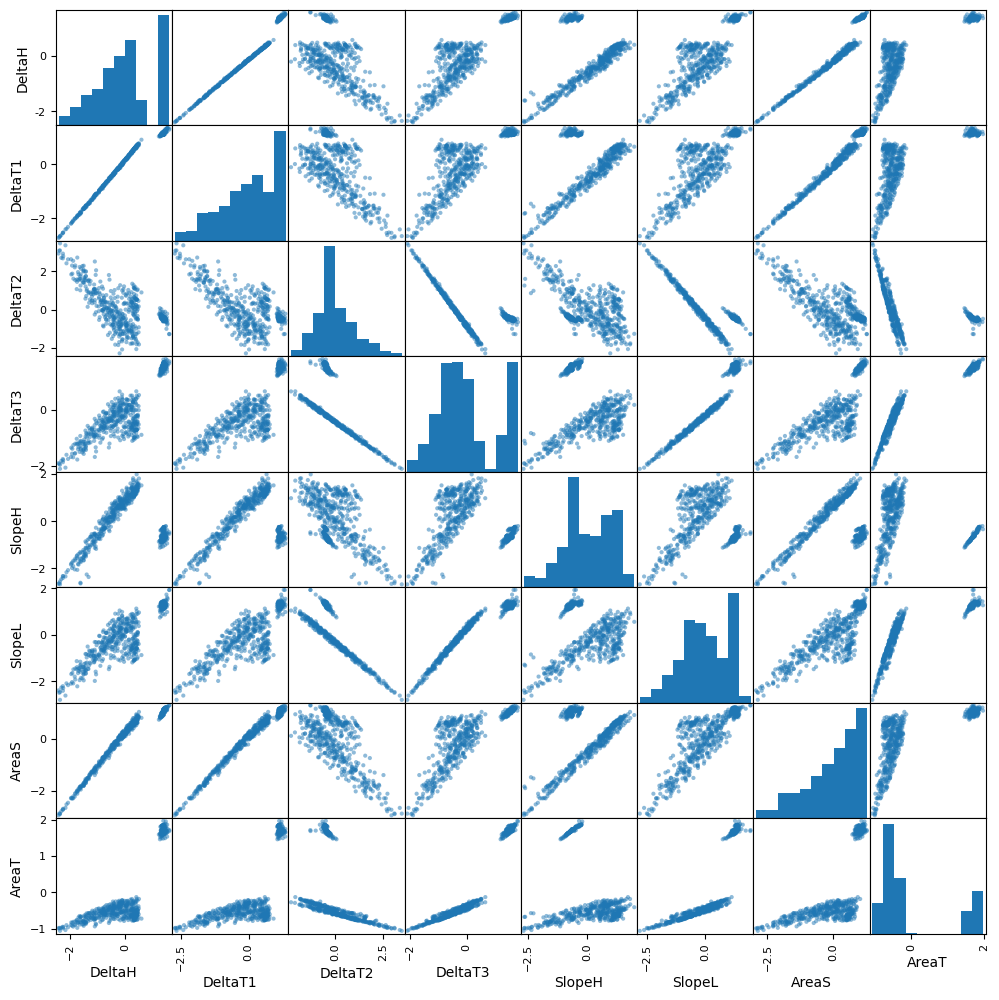

In [89]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
pd.plotting.scatter_matrix(features.loc[:,["DeltaH","DeltaT1","DeltaT2","DeltaT3","SlopeH","SlopeL","AreaS","AreaT"]], ax=ax);